# Compare Optimized Mini-Neptune Case Presented During Final Talk at NASA w/ New Script

In [3]:
#import os
#os.environ['picaso_refdata']="/mnt/c/Users/lily/Documents/NASAUWPostbac/MiniNeptuneGrid26_PostBac/picasofiles/reference" 
#os.environ['PYSYN_CDBS']="/mnt/c/Users/lily/Documents/NASAUWPostbac/MiniNeptuneGrid26_PostBac/picasofiles/grp/redcat/trds"
#import picaso.justdoit as jdi

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
#import picaso.justdoit as jdi
#import picaso.justplotit as jpi
import copy
import pandas as pd
from scipy import optimize
from matplotlib import pyplot as plt
import pickle
from itertools import cycle
import matplotlib.colors as mcolors
from photochem.utils import stars
import PICASO_Climate_grid_121625 as picaso_grid
import Photochem_grid_121625 as photochem_grid
from picaso.photochem import EquilibriumChemistry

## Load old results of K218b presented during NASA Summer 2025 Internship
- total flux: .915x solar
- metallicity: 0.5x solar
- internal temperature: 155K
- mixing coefficient: 10^5 cm^2/s

In [3]:
with open('K218b_result_dict.pkl', 'rb') as file:
        old_K218b_dictionary = pickle.load(file)
old_K218b_dictionary

{'PT_list_.915_0.5_155_5': [array([1.00000000e-06, 1.25892541e-06, 1.58489319e-06, 1.99526231e-06,
         2.51188643e-06, 3.16227766e-06, 3.98107171e-06, 5.01187234e-06,
         6.30957344e-06, 7.94328235e-06, 1.00000000e-05, 1.25892541e-05,
         1.58489319e-05, 1.99526231e-05, 2.51188643e-05, 3.16227766e-05,
         3.98107171e-05, 5.01187234e-05, 6.30957344e-05, 7.94328235e-05,
         1.00000000e-04, 1.25892541e-04, 1.58489319e-04, 1.99526231e-04,
         2.51188643e-04, 3.16227766e-04, 3.98107171e-04, 5.01187234e-04,
         6.30957344e-04, 7.94328235e-04, 1.00000000e-03, 1.25892541e-03,
         1.58489319e-03, 1.99526231e-03, 2.51188643e-03, 3.16227766e-03,
         3.98107171e-03, 5.01187234e-03, 6.30957344e-03, 7.94328235e-03,
         1.00000000e-02, 1.25892541e-02, 1.58489319e-02, 1.99526231e-02,
         2.51188643e-02, 3.16227766e-02, 3.98107171e-02, 5.01187234e-02,
         6.30957344e-02, 7.94328235e-02, 1.00000000e-01, 1.25892541e-01,
         1.58489319e-01, 

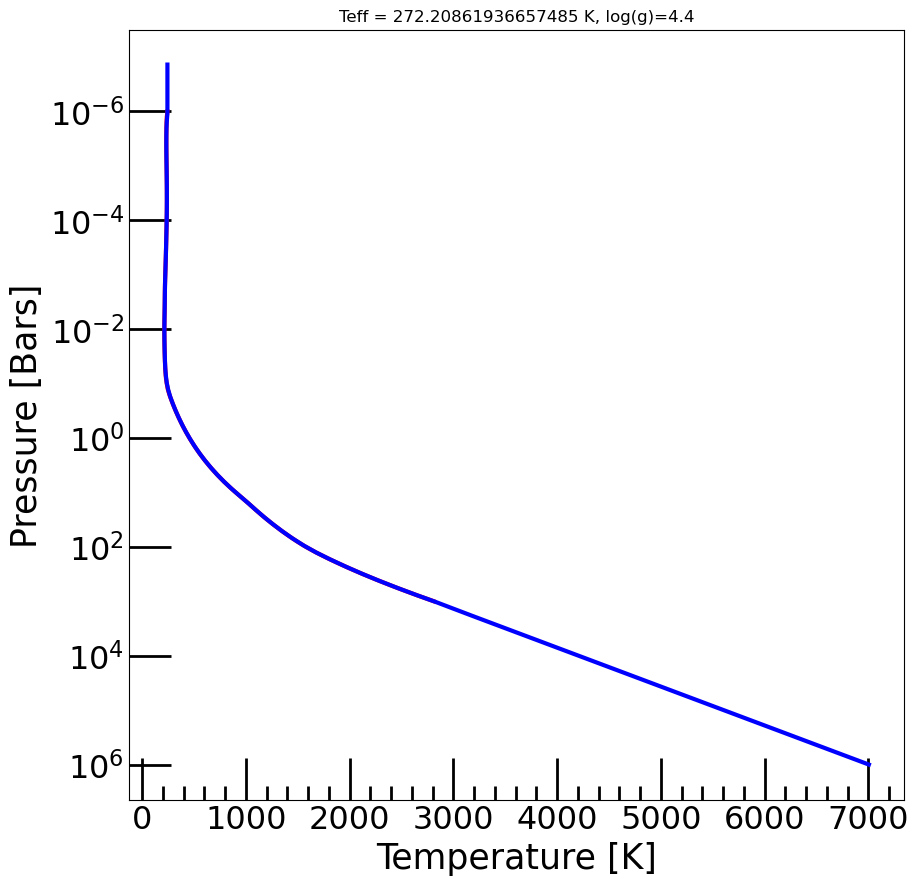

In [4]:
# Plot the PT Profile from PICASO
    
plt.figure(figsize=(10,10))
plt.ylabel("Pressure [Bars]", fontsize=25)
plt.xlabel('Temperature [K]', fontsize=25)
plt.gca().invert_yaxis()
    
plt.semilogy(old_K218b_dictionary['PT_list_.915_0.5_155_5'][1],old_K218b_dictionary['PT_list_.915_0.5_155_5'][0],color="r",linewidth=3, label='PICASO PT')
plt.semilogy(old_K218b_dictionary['PT_list_Photochem'][1],old_K218b_dictionary['PT_list_Photochem'][0]/(10**6),color="blue",linewidth=3, label='PICASO PT')
plt.minorticks_on()
plt.tick_params(axis='both',which='major',length =30, width=2,direction='in',labelsize=23)
plt.tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)

total_flux = .915
Tef = stars.equilibrium_temperature(total_flux*1361, 0)
plt.title(f"Teff = {Tef} K, log(g)=4.4")

plt.show()

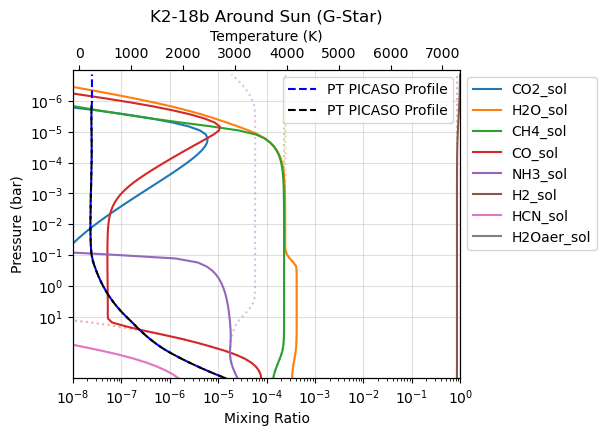

In [5]:
# This is the Photochemical Profile

soleq_dict = old_K218b_dictionary['soleq_dict']
sol_dict = old_K218b_dictionary['sol_dict']
PT_list_Photochem = old_K218b_dictionary['PT_list_Photochem']
PT_list = old_K218b_dictionary['PT_list_.915_0.5_155_5']

# Plot the Composition from Photochem
fig, ax1 = plt.subplots(1,1,figsize=[5,4])
#species = ['CO2','H2O','CH4','CO','NH3','H2','HCN','H2Oaer']
species_sol = ['CO2_sol','H2O_sol','CH4_sol','CO_sol','NH3_sol','H2_sol','HCN_sol','H2Oaer_sol']
species_soleq = ['CO2_soleq','H2O_soleq','CH4_soleq','CO_soleq','NH3_soleq','H2_soleq','HCN_soleq','H2Oaer_soleq']
    
#for i,sp in enumerate(species):
#    ax1.plot(sol_dict[sp],sol_dict['pressure']/1e6,label=sp, c='C'+str(i))
#    ax1.plot(soleq_dict[sp],soleq_dict['pressure']/1e6, ls=':', c='C'+str(i), alpha=0.4)
    
for i,sp in enumerate(species_soleq):
    ax1.plot(soleq_dict[sp],soleq_dict['pressure_soleq']/1e6, ls=':', c='C'+str(i), alpha=0.4)
for i,sp in enumerate(species_sol):
    ax1.plot(sol_dict[sp],sol_dict['pressure_sol']/1e6, c='C'+str(i), label=sp)
    
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(1e-8,1)
ax1.set_ylim(1000,1e-7)
ax1.grid(alpha=0.4)
ax1.legend(ncol=1,bbox_to_anchor=(1,1.0),loc='upper left')
ax1.set_xlabel('Mixing Ratio')
ax1.set_ylabel('Pressure (bar)')
ax1.set_yticks(10.0**np.arange(-6,2))
    
ax2 = ax1.twiny()
ax2.set_xlabel('Temperature (K)')

ax2.plot(PT_list_Photochem[1], (PT_list_Photochem[0]/(10**6)), c='blue', ls='--',label='PT PICASO Profile')
ax2.plot(np.flip(PT_list[1]), np.flip(PT_list[0]), c='black', ls='--',label='PT PICASO Profile')
    
plt.title('K2-18b Around Sun (G-Star)')
    
plt.legend()

plt.show()

## Same K218b case, but with new opacities (should be relatively similar)

### Old Inputs:
- total flux: .915x solar
- metallicity: 0.5x (logspace) x solar
- internal temperature: 155K
- mixing coefficient: 10^5 cm^2/s

### New Inputs:
- planet radius: 2.61x Earth 
- metallicity: 0.5x (logspace) x solar
- tint: 155K
- semi major in AU: 1.047920906403798 AU
- ctoO_solar: 1x solar c/o ratio

### Also same star specs (assumed sun like star)


## Calculate the PT Profile using new opacities & Grid

In [6]:
def calc_semi_major_SUN(Teq):
    """
    Calculates the semi-major distance from the Sun of a planet whose equilibrium temperature can vary.
    
    Parameters:
    
    Teq: float
        This is the equilibrium temperature (in Kelvin) calculated based on total flux (or otherwise) of the planet.

    Results:
    
    distance_AU: float
        Returns the distance from the planet to the Sun to maintain equilibrium temperature in AU.
    
    """
    luminosity_star = 3.846*(10**26) # in Watts for the Sun
    boltzmann_const = 5.670374419*(10**-8) # in W/m^2 * K^4 for the Sun
    distance_m = np.sqrt(luminosity_star / (16 * np.pi * boltzmann_const * (Teq**4)))
    distance_AU = distance_m / 1.496e+11
    return distance_AU

In [7]:
total_flux = 0.915
Teq = stars.equilibrium_temperature(total_flux*1361, 0) # Note converts total_flux in Earth units to Watts/m^2
semi_major = calc_semi_major_SUN(Teq=Teq) # in AU
print(semi_major)

1.047920906403798


In [8]:
# Manually Run Picaso to test functionality of definition
# out, base_case = picaso_grid.PICASO_PT_Planet(rad_plan=2.61, mh=0.5, tint=155, semi_major_AU=1.04, ctoO=1)

In [9]:
with h5py.File('/mnt/c/Users/lily/Documents/NASAUWPostbac/MiniNeptuneGrid26_PostBac/results/PICASO_climate_updatop_test.h5', 'r') as f:
    print(list(f['inputs']))
    #print(list(f['results']['pressure']))
    pressure = list(f['results']['pressure'])
    temperature = list(f['results']['temperature'])

[array([  2.61,   0.5 , 155.  ,   1.  ,   1.  ])]


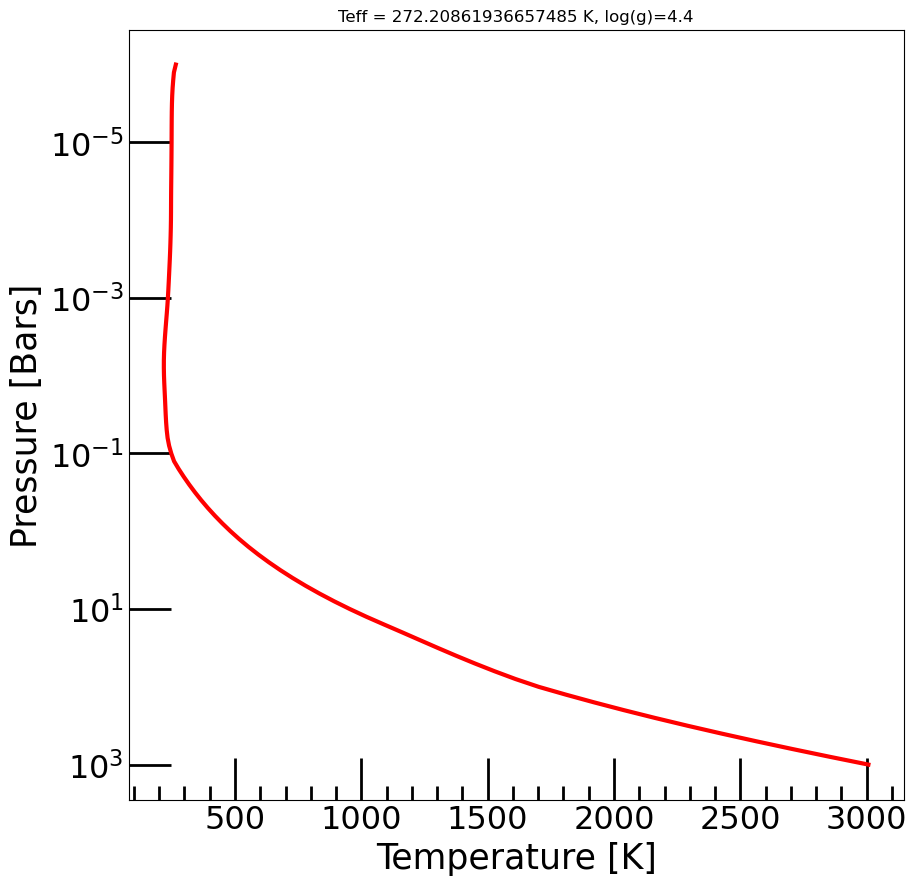

In [10]:
plt.figure(figsize=(10,10))
plt.ylabel("Pressure [Bars]", fontsize=25)
plt.xlabel('Temperature [K]', fontsize=25)
plt.gca().invert_yaxis()
#plt.ylim(500,1e-4)
#plt.xlim(250,1750)

plt.semilogy(temperature[0][0][0][0][0],pressure[0][0][0][0][0],color="r",linewidth=3, label='PICASO PT')
#plt.semilogy(PT_list_Photochem[1],PT_list_Photochem[0]/(10**6),color="blue",linewidth=3, label='PICASO PT')
plt.minorticks_on()
plt.tick_params(axis='both',which='major',length =30, width=2,direction='in',labelsize=23)
plt.tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)

Tef = stars.equilibrium_temperature(total_flux*1361, 0)
plt.title(f"Teff = {Tef} K, log(g)=4.4")

plt.show()

## Calculate the Photochemistry using new opacities and grid

In [11]:
sol, soleq, pc, convergence_values, convergead = photochem_grid.Photochem_Gas_Giant(rad_plan=2.61, log10_planet_metallicity='0.5', tint=155, semi_major=1, ctoO=1, log_Kzz=5, PT_filename='results/PICASO_climate_updatop_test.h5')

The stellar flux file already exists
[  2.61   0.5  155.     1.     1.  ]
[array([  2.61,   0.5 , 155.  ,   1.  ,   1.  ])]
[array([ True,  True,  True,  True,  True])]
[0.5]
0.5
Was able to successfully find your input parameters in the PICASO TP profile grid!
nsteps = 100  longdy = 5.8e-01  max_dT = 1.0e+00  max_dlog10edd = 0.0e+00  TOA_pressure = 1.2e-07
nsteps = 200  longdy = 4.2e+00  max_dT = 1.0e+00  max_dlog10edd = 0.0e+00  TOA_pressure = 1.2e-07
nsteps = 300  longdy = 6.8e+00  max_dT = 1.0e+00  max_dlog10edd = 0.0e+00  TOA_pressure = 1.2e-07
nsteps = 400  longdy = 5.4e+01  max_dT = 1.0e+00  max_dlog10edd = 0.0e+00  TOA_pressure = 1.2e-07
nsteps = 500  longdy = 2.7e+02  max_dT = 1.0e+00  max_dlog10edd = 0.0e+00  TOA_pressure = 1.2e-07
nsteps = 600  longdy = 3.1e+03  max_dT = 1.0e+00  max_dlog10edd = 0.0e+00  TOA_pressure = 1.2e-07
nsteps = 700  longdy = 3.3e+03  max_dT = 1.0e+00  max_dlog10edd = 0.0e+00  TOA_pressure = 1.2e-07
nsteps = 800  longdy = 6.7e+03  max_dT = 1.0e+00  ma

In [12]:
sol.keys()

dict_keys(['pressure', 'temperature', 'Kzz', 'H2Oaer', 'CO2aer', 'NH3aer', 'N2Oaer', 'C2H2aer', 'C2H4aer', 'C2H6aer', 'CH3CNaer', 'HCCCNaer', 'HCNaer', 'CH4aer', 'He', 'H', 'H2', 'H2O', 'OH', 'O', 'O2', 'CO', 'CO2', 'HCO', 'H2CO', 'C', 'CH', 'CH2', 'CH3', 'CH4', 'CN', 'HCN', 'N', 'N2', 'NH', 'NH2', 'NH3', 'C2', 'C2H', 'C2H2', 'C2H4', 'NO', 'HNO', 'HO2', 'HNCO', 'N2O', 'H2O2', 'O3', 'NO2', 'NO3', 'HNO2', 'HNO3', 'N2H4', 'C2H6', 'CH3OH', 'CH2CO', 'CH3CHO', 'C3H4', 'C3H6', 'C4H2', 'C4H4', 'C2H3', 'C2H5', 'NCO', '1CH2', 'HCCO', 'NNH', 'CH3O', 'H2COH', 'H2CN', 'N2H2', 'C4H', 'HCNOH', 'C2H2OH', 'CH3CO', 'CH2CHO', 'C2H3OH', 'C2H4OH', 'CH3O2', 'O1D', 'N2H3', 'NH2CO', 'C4H3', 'CH2N2', 'N2D', 'CH2CN', 'CH3CN', 'HCCCN'])

In [13]:
pressure[0][0][0][0][0]

array([1.00000000e-06, 1.25892541e-06, 1.58489319e-06, 1.99526231e-06,
       2.51188643e-06, 3.16227766e-06, 3.98107171e-06, 5.01187234e-06,
       6.30957344e-06, 7.94328235e-06, 1.00000000e-05, 1.25892541e-05,
       1.58489319e-05, 1.99526231e-05, 2.51188643e-05, 3.16227766e-05,
       3.98107171e-05, 5.01187234e-05, 6.30957344e-05, 7.94328235e-05,
       1.00000000e-04, 1.25892541e-04, 1.58489319e-04, 1.99526231e-04,
       2.51188643e-04, 3.16227766e-04, 3.98107171e-04, 5.01187234e-04,
       6.30957344e-04, 7.94328235e-04, 1.00000000e-03, 1.25892541e-03,
       1.58489319e-03, 1.99526231e-03, 2.51188643e-03, 3.16227766e-03,
       3.98107171e-03, 5.01187234e-03, 6.30957344e-03, 7.94328235e-03,
       1.00000000e-02, 1.25892541e-02, 1.58489319e-02, 1.99526231e-02,
       2.51188643e-02, 3.16227766e-02, 3.98107171e-02, 5.01187234e-02,
       6.30957344e-02, 7.94328235e-02, 1.00000000e-01, 1.25892541e-01,
       1.58489319e-01, 1.99526231e-01, 2.51188643e-01, 3.16227766e-01,
      

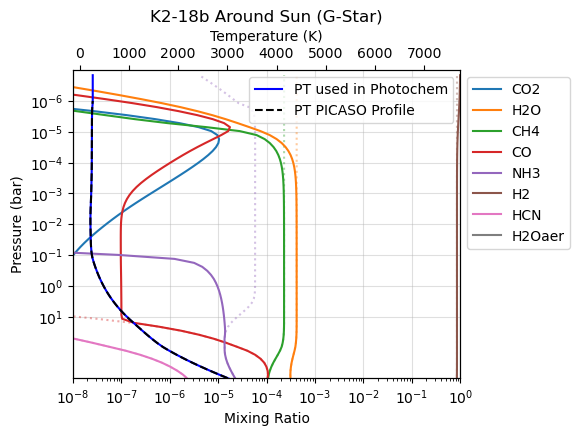

In [14]:
# This is the Photochemical Profile

# Plot the Composition from Photochem
fig, ax1 = plt.subplots(1,1,figsize=[5,4])
#species = ['CO2','H2O','CH4','CO','NH3','H2','HCN','H2Oaer']
species_sol = ['CO2','H2O','CH4','CO','NH3','H2','HCN','H2Oaer']
species_soleq = ['CO2','H2O','CH4','CO','NH3','H2','HCN','H2Oaer']
    
#for i,sp in enumerate(species):
#    ax1.plot(sol_dict[sp],sol_dict['pressure']/1e6,label=sp, c='C'+str(i))
#    ax1.plot(soleq_dict[sp],soleq_dict['pressure']/1e6, ls=':', c='C'+str(i), alpha=0.4)
    
for i,sp in enumerate(species_soleq):
    ax1.plot(soleq[sp],soleq['pressure']/1e6, ls=':', c='C'+str(i), alpha=0.4)
for i,sp in enumerate(species_sol):
    ax1.plot(sol[sp],sol['pressure']/1e6, c='C'+str(i), label=sp)
    
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(1e-8,1)
ax1.set_ylim(1000,1e-7)
ax1.grid(alpha=0.4)
ax1.legend(ncol=1,bbox_to_anchor=(1,1.0),loc='upper left')
ax1.set_xlabel('Mixing Ratio')
ax1.set_ylabel('Pressure (bar)')
ax1.set_yticks(10.0**np.arange(-6,2))
    
ax2 = ax1.twiny()
ax2.set_xlabel('Temperature (K)')

ax2.plot(sol['temperature'], sol['pressure']/10**6, c='blue', label='PT used in Photochem')
ax2.plot(np.flip(temperature[0][0][0][0][0]), np.flip(pressure[0][0][0][0][0]), c='black', ls='--',label='PT PICASO Profile')
    
plt.title('K2-18b Around Sun (G-Star)')
    
plt.legend()

plt.show()

## Finally compare the TP profiles of the old method vs new method, noting distance to planet and total flux aren't exactly matching

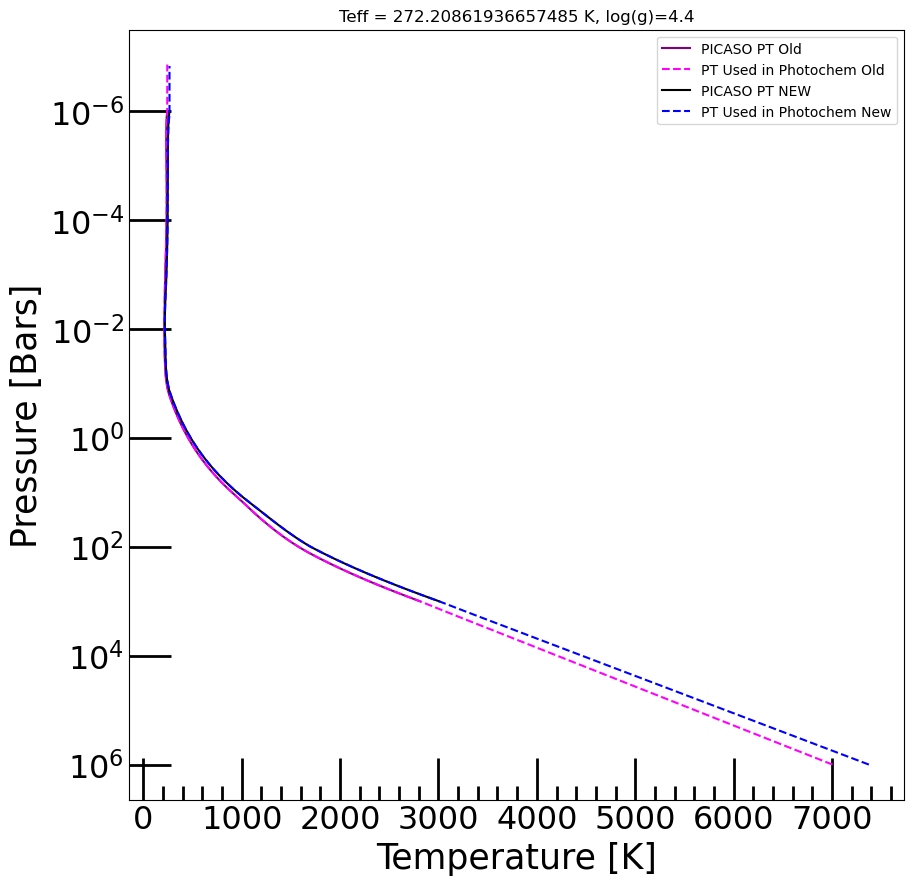

In [15]:
# Plot the PT Profile from PICASO
    
plt.figure(figsize=(10,10))
plt.ylabel("Pressure [Bars]", fontsize=25)
plt.xlabel('Temperature [K]', fontsize=25)
plt.gca().invert_yaxis()
    
plt.semilogy(old_K218b_dictionary['PT_list_.915_0.5_155_5'][1],old_K218b_dictionary['PT_list_.915_0.5_155_5'][0],color="purple", ls='-', label='PICASO PT Old')
plt.semilogy(old_K218b_dictionary['PT_list_Photochem'][1],old_K218b_dictionary['PT_list_Photochem'][0]/(10**6),color="magenta",ls='--', label='PT Used in Photochem Old')

plt.semilogy(temperature[0][0][0][0][0], pressure[0][0][0][0][0],color="black", label='PICASO PT NEW')
plt.semilogy(sol['temperature'], sol['pressure']/10**6,color="blue", ls='--', label='PT Used in Photochem New')

plt.minorticks_on()
plt.tick_params(axis='both',which='major',length =30, width=2,direction='in',labelsize=23)
plt.tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)

total_flux = .915
Tef = stars.equilibrium_temperature(total_flux*1361, 0)
plt.title(f"Teff = {Tef} K, log(g)=4.4")
plt.legend()

plt.show()

### Attempt at Guessed Parameter Space with Oxygen Rich Atmosphere
We expect this exploration to differ from the prior cases, so make sure to take a look at atmospheric composition in its entirety without limiting as much initially (specific to elements you are looking for and molecules).

Parameters:
- planet radius: 2.61x Earth
- **metallicity: 3.45x (logspace) x solar (~3000x solar metallicity)**
- tint: 155K
- semi major in AU: 1 AU
- **ctoO_solar: 0.01 x solar c/o ratio**

In [2]:
# Manually Run Picaso to test functionality of definition
out, base_case = picaso_grid.PICASO_PT_Planet(rad_plan=2.61, log_mh=3.5, tint=155, semi_major_AU=1, ctoO=1, outputfile=3.5)

Input Values: rad_plan=2.61, mh=3.5, tint=155, semi_major_AU=1, ctoO=1
SUMMARY
-------
Clouds: False
quench False
cold_trap False
vol_rainout False
no_ph3 False
Moist Adiabat: False
Iteration number  0 , min , max temp  245.0258784369354 1945.2050617690134 , flux balance  9.182148621700325
Iteration number  1 , min , max temp  245.00170889550893 1947.9494460367516 , flux balance  9.172399805831468
Iteration number  2 , min , max temp  244.97064757266526 1950.8331241332105 , flux balance  9.162042427710311
Iteration number  3 , min , max temp  244.93448936289232 1953.8602884875206 , flux balance  9.151043466554482
Iteration number  4 , min , max temp  244.89334730015636 1957.0350151661282 , flux balance  9.139368472487106
Iteration number  5 , min , max temp  244.84785556735963 1960.3612432663115 , flux balance  9.126981528147935
Iteration number  6 , min , max temp  244.7984937492408 1963.8427552968851 , flux balance  9.11384520743109
Iteration number  7 , min , max temp  244.743434371

Exception: The equilibrium chemistry solver failed to converge.

In [3]:
!pip show photochem

Name: photochem
Version: 0.6.8
Summary: Photochemical model of planet's atmospheres.
Home-page: https://github.com/Nicholaswogan/Photochem
Author: Nicholas Wogan
Author-email: nicholaswogan@gmail.com
License: GNU General Public License v3.0
Location: /home/elizap712/miniforge3/envs/subneptune/lib/python3.12/site-packages
Requires: astropy, h5py, numba, numpy, pyyaml, requests, scipy, threadpoolctl
Required-by: 


In [15]:
file_path = "/mnt/c/Users/lily/Documents/NASAUWPostbac/MiniNeptuneGrid26_PostBac/climate_output_3.5_error.pkl"
with open(file_path, 'rb') as file:
    data = pickle.load(file)
    print(data)

EOFError: Ran out of input

In [3]:
file_path = "/mnt/c/Users/lily/Documents/NASAUWPostbac/MiniNeptuneGrid26_PostBac/equilibrium_chemistry.pkl"
with open(file_path, 'rb') as file:
    data = pickle.load(file)
    print(data)

(array([1.00000000e-06, 1.25892541e-06, 1.58489319e-06, 1.99526231e-06,
       2.51188643e-06, 3.16227766e-06, 3.98107171e-06, 5.01187234e-06,
       6.30957344e-06, 7.94328235e-06, 1.00000000e-05, 1.25892541e-05,
       1.58489319e-05, 1.99526231e-05, 2.51188643e-05, 3.16227766e-05,
       3.98107171e-05, 5.01187234e-05, 6.30957344e-05, 7.94328235e-05,
       1.00000000e-04, 1.25892541e-04, 1.58489319e-04, 1.99526231e-04,
       2.51188643e-04, 3.16227766e-04, 3.98107171e-04, 5.01187234e-04,
       6.30957344e-04, 7.94328235e-04, 1.00000000e-03, 1.25892541e-03,
       1.58489319e-03, 1.99526231e-03, 2.51188643e-03, 3.16227766e-03,
       3.98107171e-03, 5.01187234e-03, 6.30957344e-03, 7.94328235e-03,
       1.00000000e-02, 1.25892541e-02, 1.58489319e-02, 1.99526231e-02,
       2.51188643e-02, 3.16227766e-02, 3.98107171e-02, 5.01187234e-02,
       6.30957344e-02, 7.94328235e-02, 1.00000000e-01, 1.25892541e-01,
       1.58489319e-01, 1.99526231e-01, 2.51188643e-01, 3.16227766e-01,
     

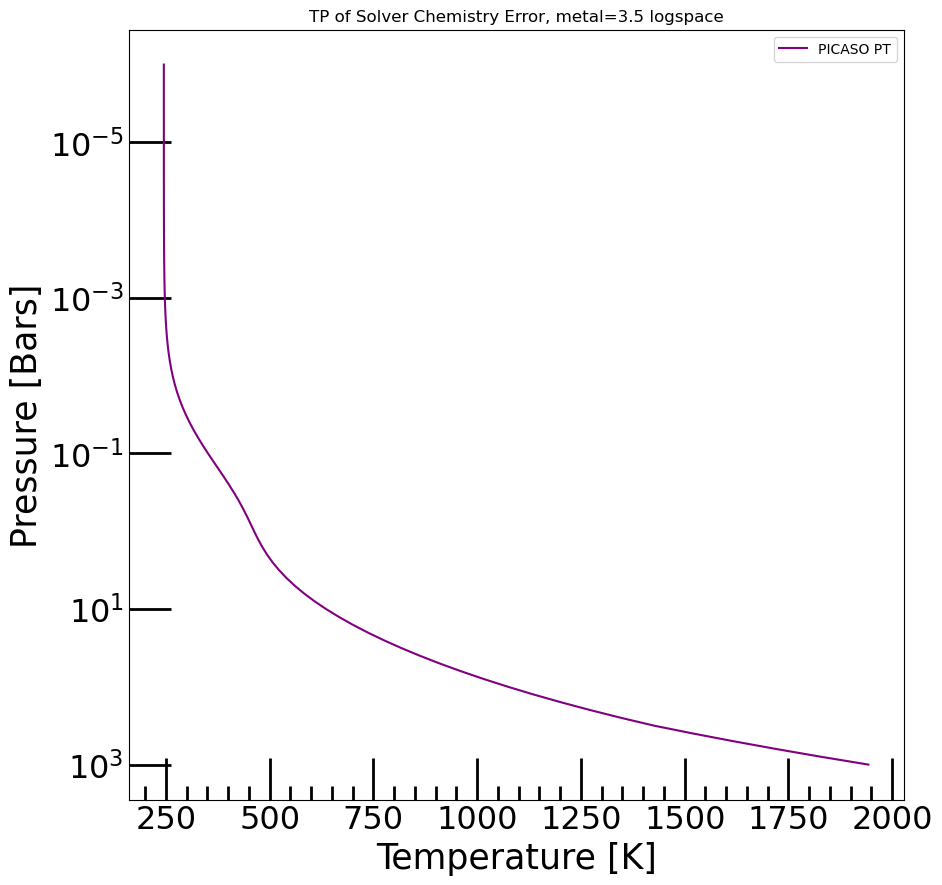

In [5]:
# Plot the PT Profile from PICASO
    
plt.figure(figsize=(10,10))
plt.ylabel("Pressure [Bars]", fontsize=25)
plt.xlabel('Temperature [K]', fontsize=25)
plt.gca().invert_yaxis()
    
plt.semilogy(data[1],data[0],color="purple", ls='-', label='PICASO PT')

plt.minorticks_on()
plt.tick_params(axis='both',which='major',length =30, width=2,direction='in',labelsize=23)
plt.tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)

total_flux = .915
Tef = stars.equilibrium_temperature(total_flux*1361, 0)
plt.title(f"TP of Solver Chemistry Error, metal=3.5 logspace")
plt.legend()

plt.show()

In [7]:
from picaso import photochem as picasochem
import pickle
import numpy as np
from matplotlib import pyplot as plt
import os

__refdata__ = os.environ.get('picaso_refdata')
thermofile = os.path.join(__refdata__,'chemistry','thermo_data','thermo-sonora-component.yaml') 
cea = picasochem.EquilibriumChemistry(
    thermofile=thermofile, 
    method='sonora-approx'
)
res = []
with open('equilibrium_chemistry.pkl','rb') as f:
    while True:
        try:
            tmp = pickle.load(f)
            res.append(tmp)
        except EOFError:
            break
P, T, log10mh, CtoO_relative = res[-1]
gases, condensates = cea.equilibrate_atmosphere(P+P*1e-8, T, log10mh, CtoO_relative)

In [8]:
print(gases)

{'e-': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,

In [5]:
from photochem import _equilibrate
print(_equilibrate.__version__)

0.2.0


In [6]:
from photochem import __version__
print(__version__)

0.6.8


In [10]:
import os

file_path = "/mnt/c/Users/lily/Documents/NASAUWPostbac/MiniNeptuneGrid26_PostBac/equilibrium_chemistry.pkl"
os.path.exists(file_path)

True

In [3]:
out

NameError: name 'out' is not defined

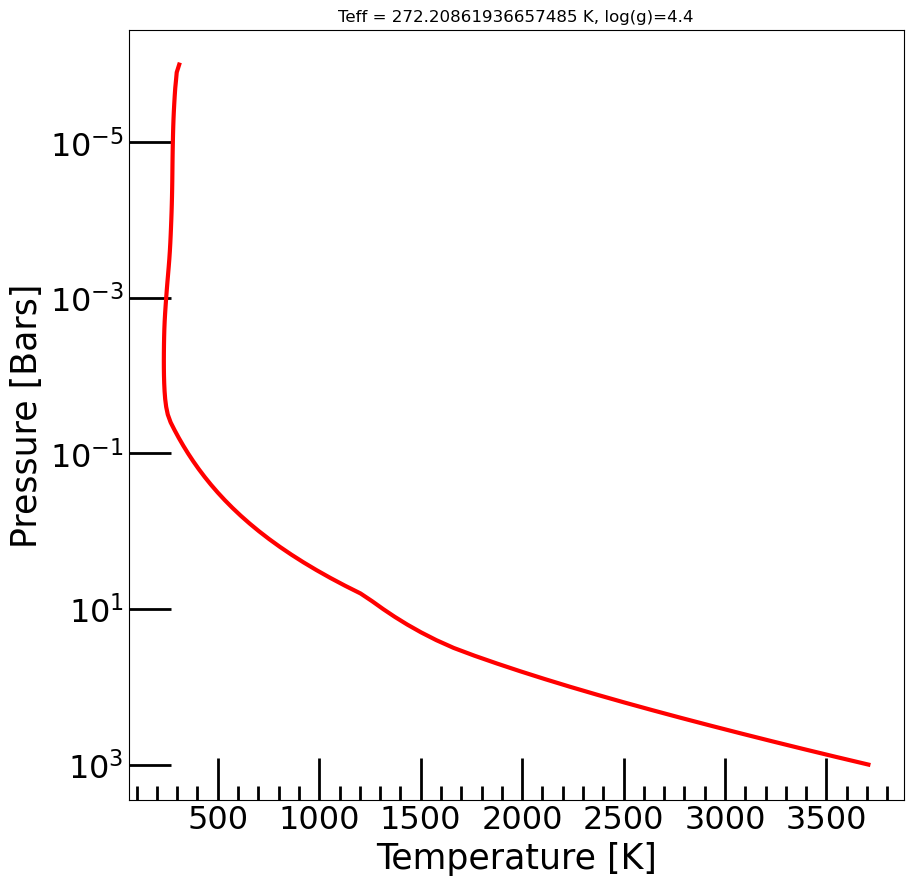

In [9]:
# Plot the PT Profile from PICASO
    
plt.figure(figsize=(10,10))
plt.ylabel("Pressure [Bars]", fontsize=25)
plt.xlabel('Temperature [K]', fontsize=25)
plt.gca().invert_yaxis()
    
plt.semilogy(out['temperature'],out['pressure'],color="r",linewidth=3, label='PICASO PT')
#plt.semilogy(old_K218b_dictionary['PT_list_Photochem'][1],old_K218b_dictionary['PT_list_Photochem'][0]/(10**6),color="blue",linewidth=3, label='PICASO PT')
plt.minorticks_on()
plt.tick_params(axis='both',which='major',length =30, width=2,direction='in',labelsize=23)
plt.tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)

total_flux = .915
Tef = stars.equilibrium_temperature(total_flux*1361, 0)
plt.title(f"Teff = {Tef} K, log(g)=4.4")

plt.show()

In [3]:
with h5py.File('/mnt/c/Users/lily/Documents/NASAUWPostbac/MiniNeptuneGrid26_PostBac/results/PICASO_climate_updatop_3000metal_K218b.h5', 'r') as f:
    print(list(f['inputs']))
    #print(list(f['results']['pressure']))
    pressure_3000metal_001co_K218b = list(f['results']['pressure'])
    temperature_3000metal_001co_K218b = list(f['results']['temperature'])

KeyError: "Unable to synchronously open object (object 'inputs' doesn't exist)"

In [14]:
# Load the Sonora thermodynamic data
import os
thermofile = os.path.join(__refdata__, 'chemistry', 'thermo_data', 'thermo-sonora-component.yaml')
solver = EquilibriumChemistry(thermofile=thermofile, method='sonora-approx')

NameError: name '__refdata__' is not defined

In [ ]:
rad_plan = 2.61
log10_metal = '3.45'
tint = 155
semimajor = 1
ctoO = 0.01
Kzz = 5
filename = '/mnt/c/Users/lily/Documents/NASAUWPostbac/MiniNeptuneGrid26_PostBac/results/PICASO_climate_updatop_3000metal_001co_K218b.h5'

sol_3000m_001co, soleq_3000m_001co, pc_3000m_001co, convergence_values_3000m_001co, convergead_3000m_001co = photochem_grid.Photochem_Gas_Giant(rad_plan=rad_plan, log10_planet_metallicity=log10_metal, tint=tint, semi_major=semi_major, ctoO=ctoO, log_Kzz=Kzz, PT_filename=filename)

In [ ]:
# This is the Photochemical Profile

# Plot the Composition from Photochem
fig, ax1 = plt.subplots(1,1,figsize=[5,4])
#species = ['CO2','H2O','CH4','CO','NH3','H2','HCN','H2Oaer']
species_sol = ['CO2','H2O','CH4','CO','NH3','H2','HCN','H2Oaer']
species_soleq = ['CO2','H2O','CH4','CO','NH3','H2','HCN','H2Oaer']
    
#for i,sp in enumerate(species):
#    ax1.plot(sol_dict[sp],sol_dict['pressure']/1e6,label=sp, c='C'+str(i))
#    ax1.plot(soleq_dict[sp],soleq_dict['pressure']/1e6, ls=':', c='C'+str(i), alpha=0.4)
    
for i,sp in enumerate(species_soleq):
    ax1.plot(soleq_3000m_001co[sp],soleq_3000m_001co['pressure']/1e6, ls=':', c='C'+str(i), alpha=0.4)
for i,sp in enumerate(species_sol):
    ax1.plot(sol_3000m_001co[sp],sol_3000m_001co['pressure']/1e6, c='C'+str(i), label=sp)
    
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(1e-8,1)
ax1.set_ylim(1000,1e-7)
ax1.grid(alpha=0.4)
ax1.legend(ncol=1,bbox_to_anchor=(1,1.0),loc='upper left')
ax1.set_xlabel('Mixing Ratio')
ax1.set_ylabel('Pressure (bar)')
ax1.set_yticks(10.0**np.arange(-6,2))
    
ax2 = ax1.twiny()
ax2.set_xlabel('Temperature (K)')

ax2.plot(sol_3000m_001co['temperature'], sol_3000m_001co['pressure']/10**6, c='blue', label='PT used in Photochem')
ax2.plot(np.flip(temperature_3000metal_001co_K218b[0][0][0][0][0]), np.flip(pressure_3000metal_001co_K218b[0][0][0][0][0]), c='black', ls='--',label='PT PICASO Profile')
    
plt.title('K2-18b Around Sun (G-Star), 3000x Solar Metal, 0.01 C/O')
    
plt.legend()

plt.show()